In [1]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
print(df.shape)
print(df.columns)


(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [3]:
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description     

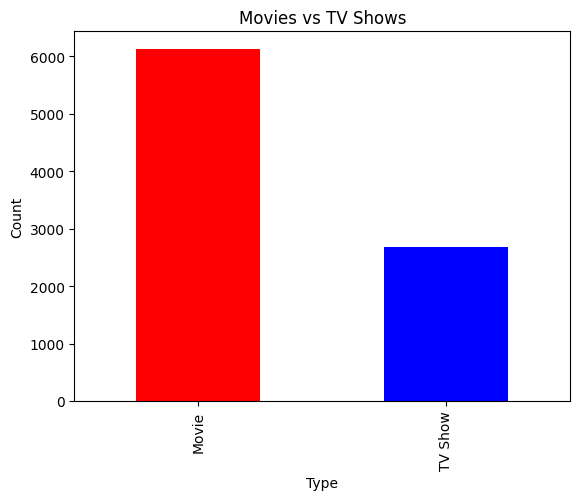

In [4]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar', color=['red','blue'])
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


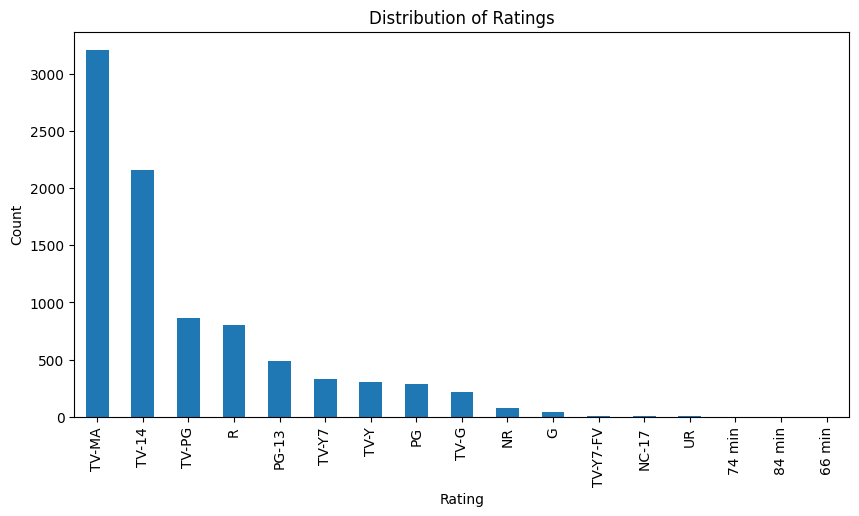

In [5]:
df['rating'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


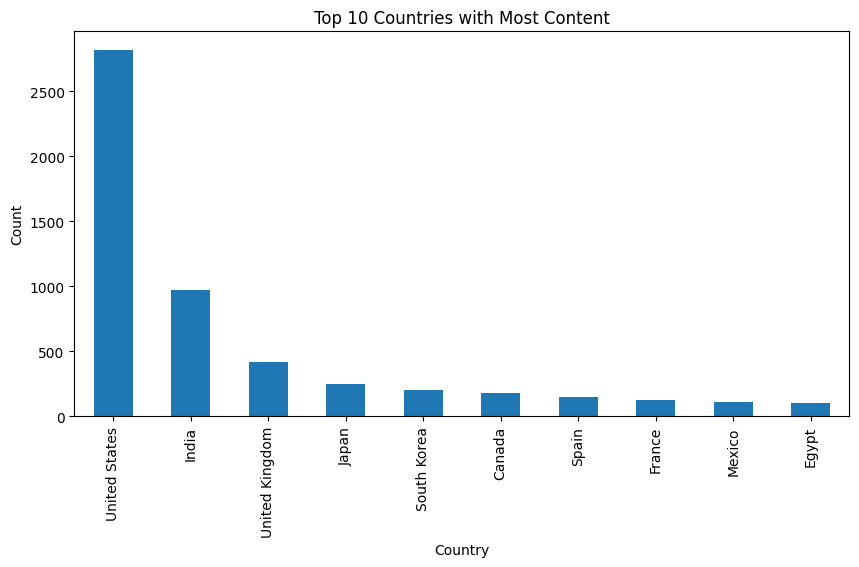

In [6]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


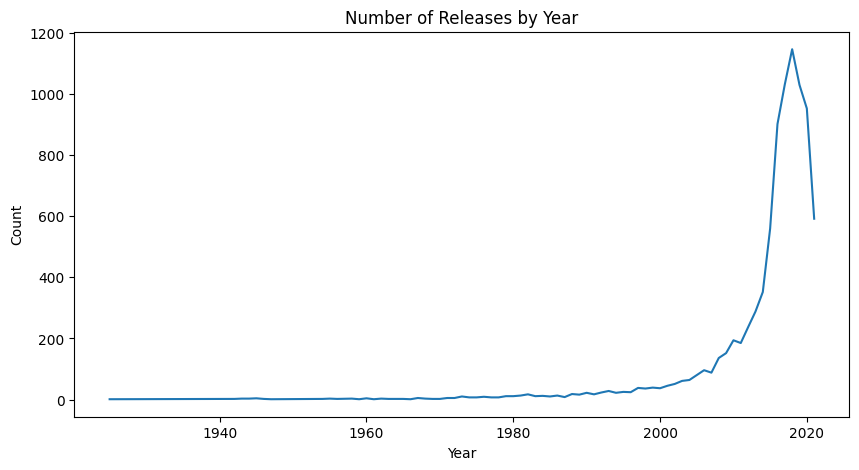

In [7]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title("Number of Releases by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [9]:

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


print(df[['date_added', 'year_added', 'month_added']].head(10))



  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0
5 2021-09-24      2021.0          9.0
6 2021-09-24      2021.0          9.0
7 2021-09-24      2021.0          9.0
8 2021-09-24      2021.0          9.0
9 2021-09-24      2021.0          9.0


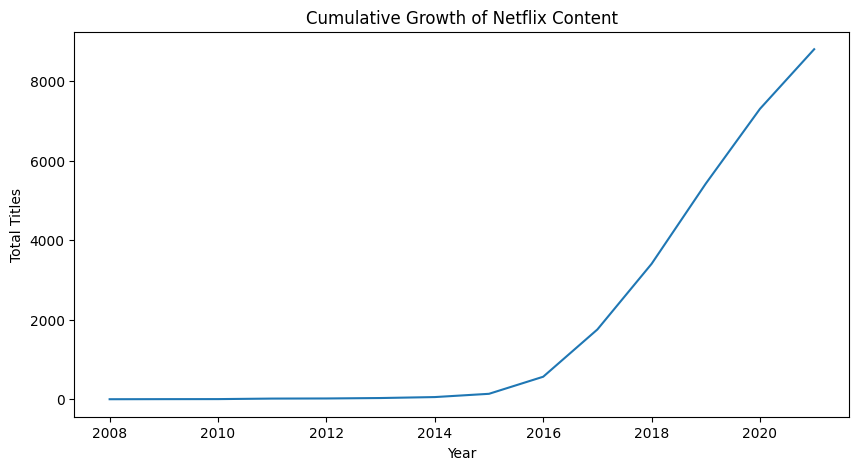

In [10]:
df['year_added'].value_counts().sort_index().cumsum().plot(kind='line', figsize=(10,5))
plt.title("Cumulative Growth of Netflix Content")
plt.xlabel("Year")
plt.ylabel("Total Titles")
plt.show()


/tmp/ipython-input-3584612686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_minutes'] = df_movies['duration'].str.replace(" min","").astype(float)


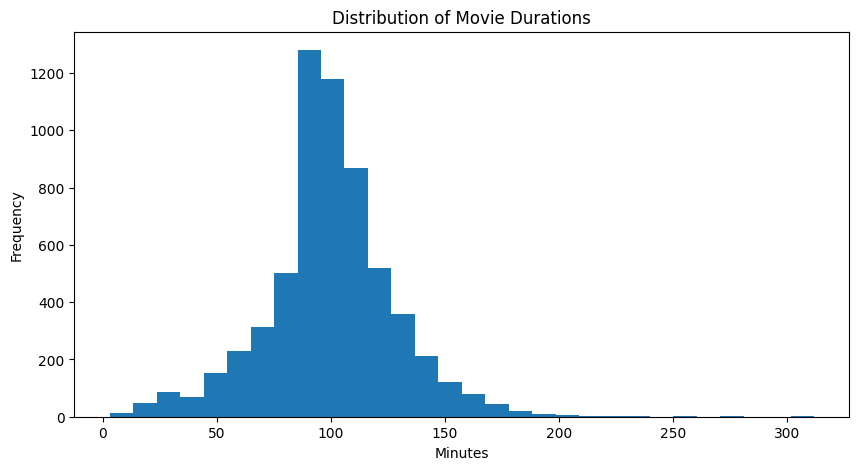

In [11]:
df_movies = df[df['type']=="Movie"]
df_movies['duration_minutes'] = df_movies['duration'].str.replace(" min","").astype(float)

df_movies['duration_minutes'].plot(kind='hist', bins=30, figsize=(10,5))
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2563393027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['seasons'] = df_tv['duration'].str.replace(" Season","").str.replace("s","").astype(int)


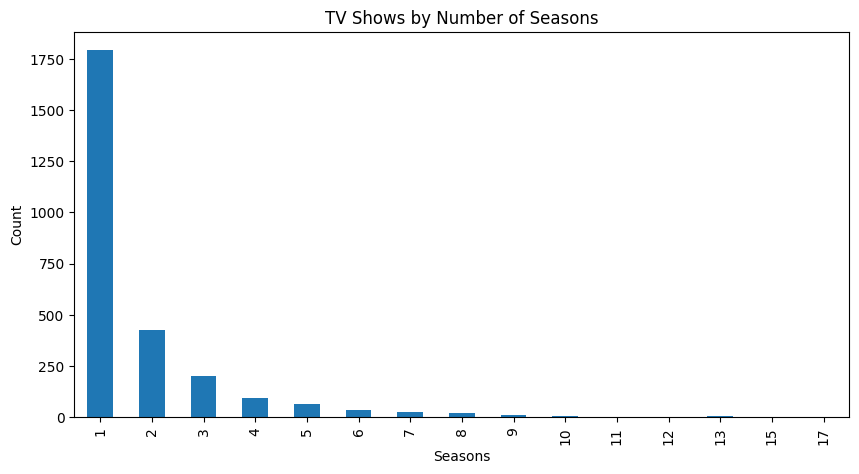

In [12]:
df_tv = df[df['type']=="TV Show"]
df_tv['seasons'] = df_tv['duration'].str.replace(" Season","").str.replace("s","").astype(int)

df_tv['seasons'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("TV Shows by Number of Seasons")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


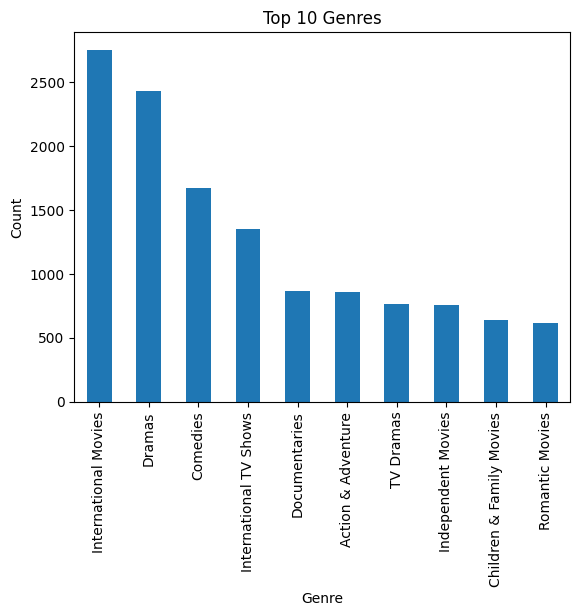

In [13]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(", ")
genre_counts = Counter([g for sublist in genres for g in sublist])

pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


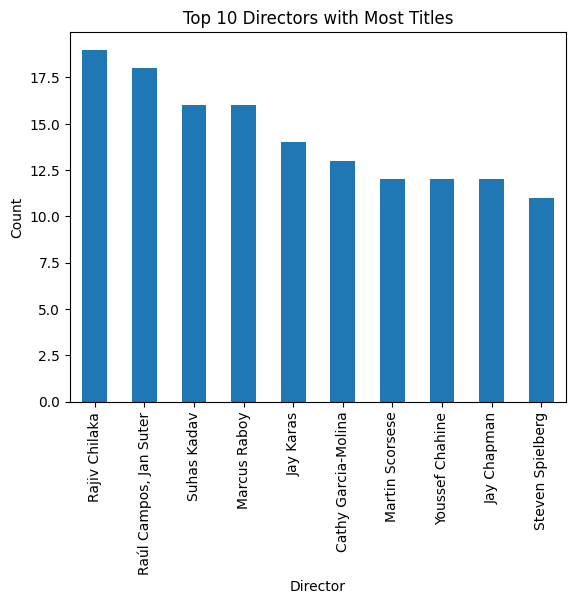

In [14]:
df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()


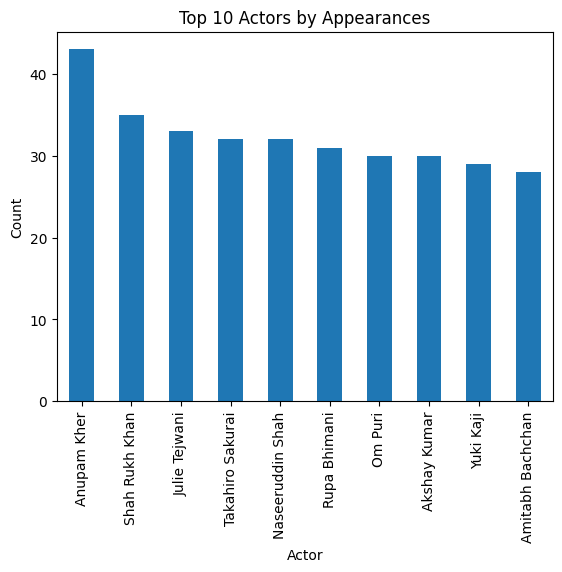

In [15]:
actors = df['cast'].dropna().str.split(", ")
actor_counts = Counter([a for sublist in actors for a in sublist])

pd.Series(actor_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Actors by Appearances")
plt.xlabel("Actor")
plt.ylabel("Count")
plt.show()


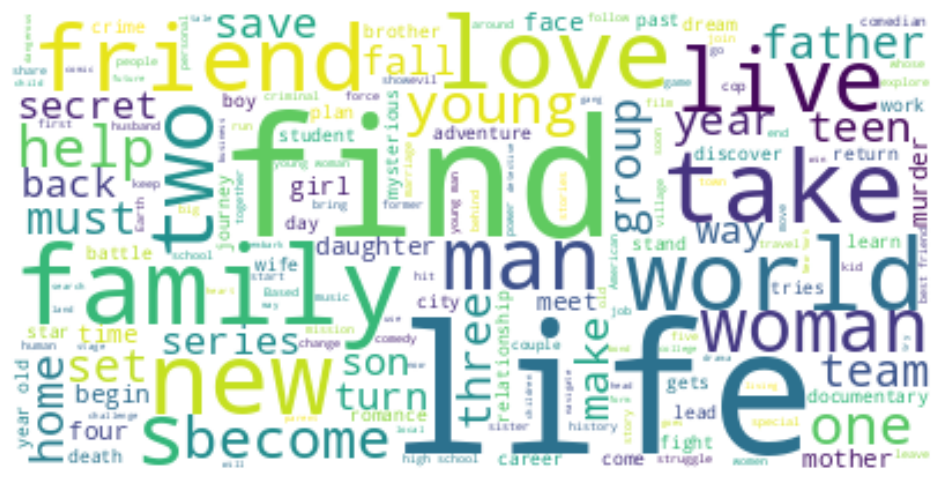

In [16]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df['description'].dropna())
wc = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


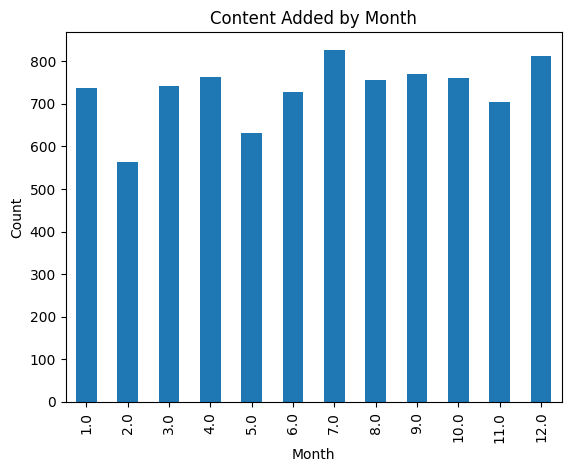

In [17]:
df['month_added'] = df['date_added'].dt.month
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


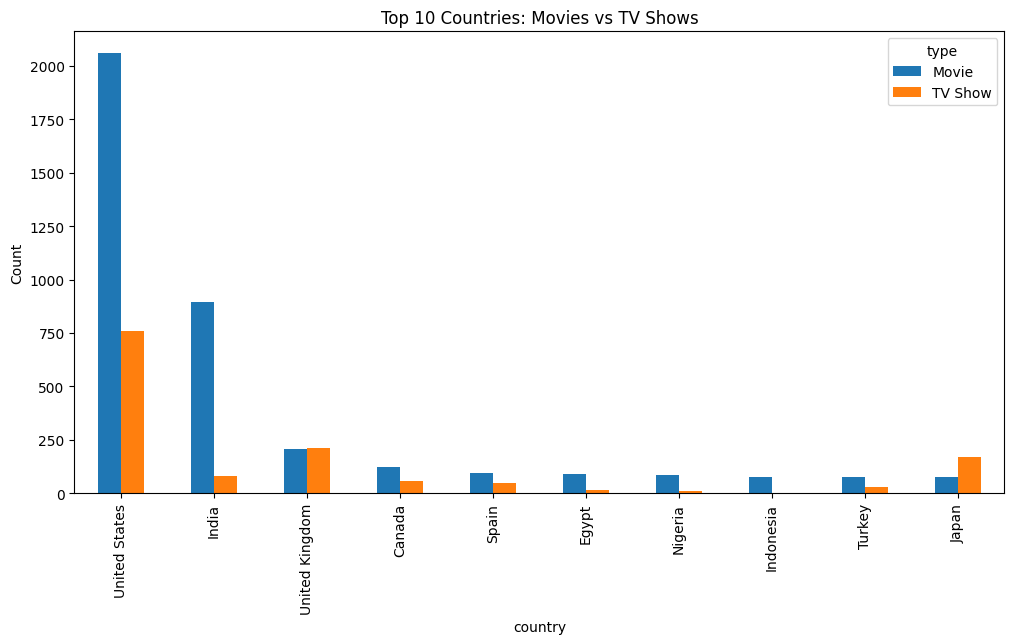

In [18]:
df.groupby(['country','type']).size().unstack().fillna(0).sort_values('Movie',ascending=False).head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries: Movies vs TV Shows")
plt.ylabel("Count")
plt.show()


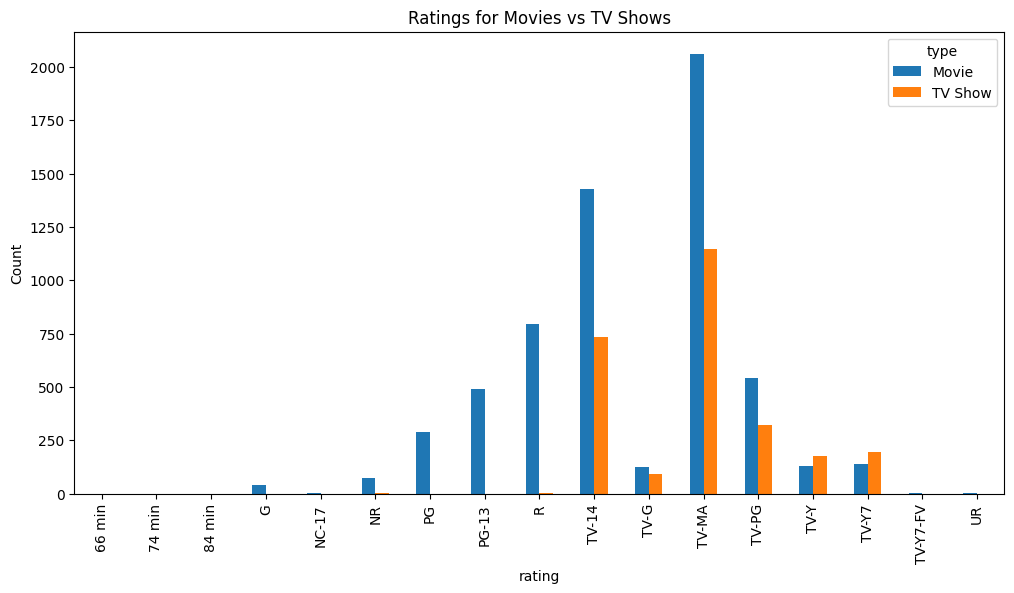

In [19]:
df.groupby(['type','rating']).size().unstack().fillna(0).T.plot(kind='bar', figsize=(12,6))
plt.title("Ratings for Movies vs TV Shows")
plt.ylabel("Count")
plt.show()


In [20]:
print("Oldest Titles:\n", df[df['release_year']==df['release_year'].min()][['title','release_year']])
print("\nNewest Titles:\n", df[df['release_year']==df['release_year'].max()][['title','release_year']])


Oldest Titles:
                                   title  release_year
4250  Pioneers: First Women Filmmakers*          1925

Newest Titles:
                           title  release_year
1                 Blood & Water          2021
2                     Ganglands          2021
3         Jailbirds New Orleans          2021
4                  Kota Factory          2021
5                 Midnight Mass          2021
...                         ...           ...
1468  What Happened to Mr. Cha?          2021
1551                      Hilda          2021
1696               Polly Pocket          2021
2920              Love Is Blind          2021
8437     The Netflix Afterparty          2021

[592 rows x 2 columns]


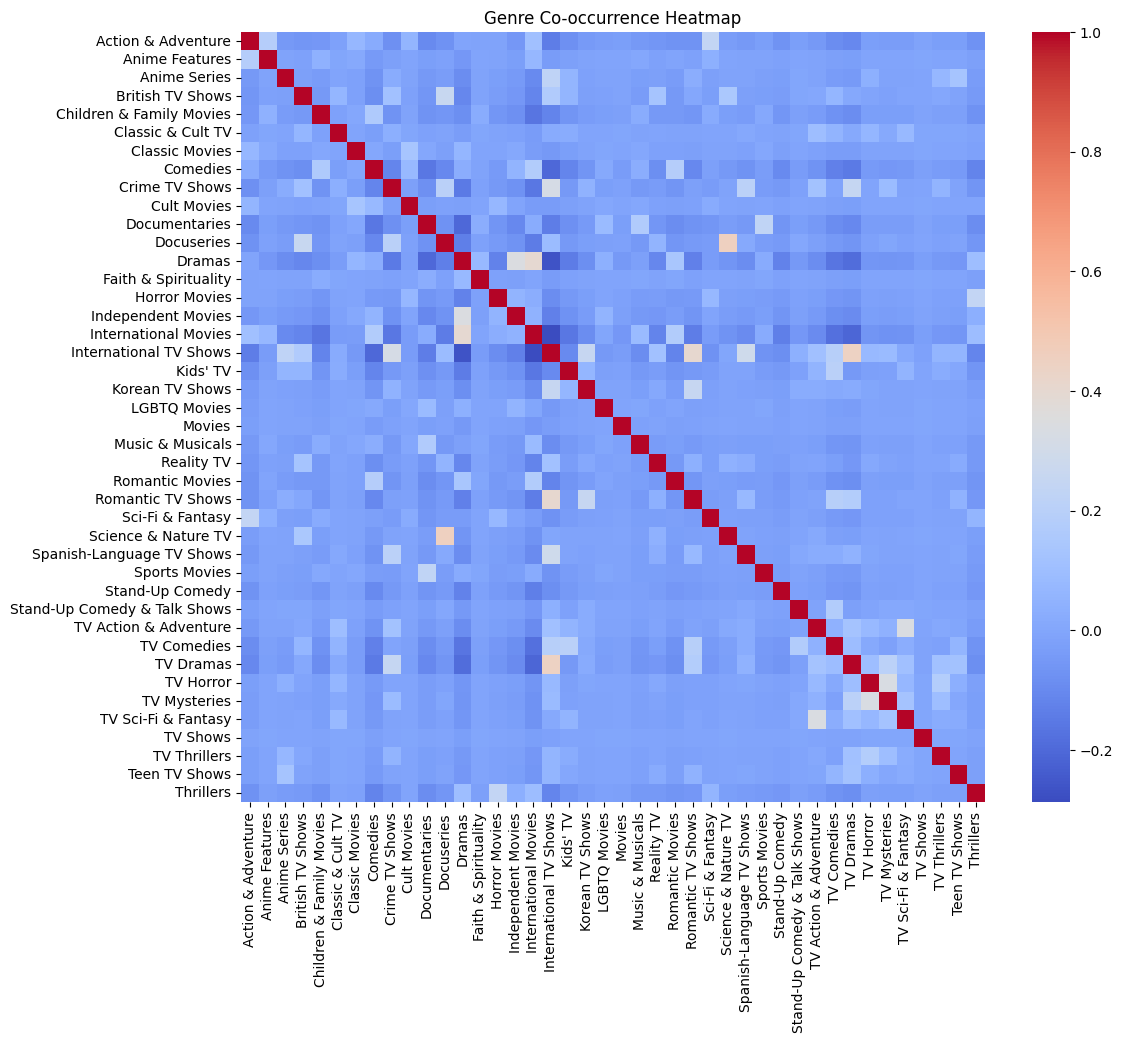

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
df['genre_list'] = df['listed_in'].dropna().apply(lambda x: x.split(", "))
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df['genre_list'])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)
corr = genre_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Genre Co-occurrence Heatmap")
plt.show()
